# Tensorflow learn

### mnist data set

In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
X_train = mnist.train.images
Y_train = mnist.train.labels
X_test = mnist.test.images
Y_test = mnist.test.labels

In [4]:
import matplotlib.pyplot as plt
import numpy as np

### linear regression

In [5]:
train_X = np.random.randn(20)
train_Y = np.random.randn(20)
n_sample = train_X.shape[0]

In [6]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [7]:
import random as rd

In [8]:
W = tf.Variable(rd.random(),name = 'weight')
b = tf.Variable(rd.random(), name = 'bias')

In [9]:
pre = tf.multiply(W,X)+ b

In [10]:
cost = tf.reduce_sum(tf.pow(pre-Y,2)) / (n_sample*2)

In [11]:
optimizer = tf.train.GradientDescentOptimizer(0.1)

In [12]:
optimizer = optimizer.minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [13]:
init = tf.global_variables_initializer()

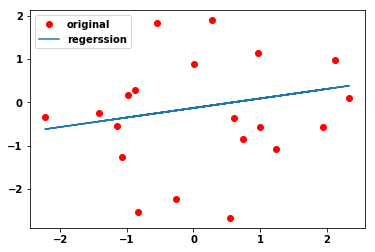

In [14]:
train_X = np.random.randn(20)
train_Y = np.random.randn(20)
with tf.Session() as S:
    S.run(init)
    for epoch in range(10):
        for x, y in zip(train_X,train_Y):
            S.run(optimizer,feed_dict={X:x,Y:y})
    plt.plot(train_X, train_Y, 'ro',label='original' )
    plt.plot(train_X, S.run(W) * train_X + S.run(b),label='regerssion' )
    plt.legend()
    plt.show()

### classification- logic regression?

In [15]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [17]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization Finished!") 

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0001 cost= 1.184052848
Epoch: 0002 cost= 0.665213393
Epoch: 0003 cost= 0.552800362
Epoch: 0004 cost= 0.498709652
Epoch: 0005 cost= 0.465499802
Epoch: 0006 cost= 0.442620554
Epoch: 0007 cost= 0.425525209
Epoch: 0008 cost= 0.412237410
Epoch: 0009 cost= 0.401394178
Epoch: 0010 cost= 0.392392668
Epoch: 0011 cost= 0.384721325
Epoch: 0012 cost= 0.378215094
Epoch: 0013 cost= 0.372429283
Epoch: 0014 cost= 0.367339631
Epoch: 0015 cost= 0.362750064
Epoch: 0016 cost= 0.358579096
Epoch: 0017 cost= 0.354894941
Epoch: 0018 cost= 0.351446913
Epoch: 0019 cost= 0.348306705
Epoch: 0020 cost= 0.345474621
Epoch: 0021 cost= 0.342734123
Epoch: 0022 cost= 0.340249637
Epoch: 0023 cost= 0.337943090
Epoch: 0024 cost= 0.335742252
Epoch: 0025 cost= 0.333726155
Optimization Finished!
Accuracy: 0.889


### KNN

In [18]:
# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.argmin(distance, 0)

accuracy = 0.

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [19]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print ("Accuracy:", accuracy)

Test 0 Prediction: 7 True Class: 2
Test 1 Prediction: 1 True Class: 1
Test 2 Prediction: 7 True Class: 7
Test 3 Prediction: 5 True Class: 5
Test 4 Prediction: 2 True Class: 2
Test 5 Prediction: 5 True Class: 5
Test 6 Prediction: 4 True Class: 4
Test 7 Prediction: 8 True Class: 8
Test 8 Prediction: 8 True Class: 8
Test 9 Prediction: 3 True Class: 3
Test 10 Prediction: 4 True Class: 4
Test 11 Prediction: 3 True Class: 3
Test 12 Prediction: 8 True Class: 8
Test 13 Prediction: 7 True Class: 7
Test 14 Prediction: 3 True Class: 3
Test 15 Prediction: 6 True Class: 6
Test 16 Prediction: 3 True Class: 3
Test 17 Prediction: 7 True Class: 7
Test 18 Prediction: 2 True Class: 2
Test 19 Prediction: 8 True Class: 8
Test 20 Prediction: 8 True Class: 8
Test 21 Prediction: 7 True Class: 7
Test 22 Prediction: 6 True Class: 6
Test 23 Prediction: 4 True Class: 4
Test 24 Prediction: 6 True Class: 6
Test 25 Prediction: 1 True Class: 1
Test 26 Prediction: 2 True Class: 2
Test 27 Prediction: 5 True Class: 5
Te

### my first simple neural network

In [91]:
X = tf.placeholder(tf.float32,[None, 784])
Y = tf.placeholder(tf.float32,[None, 10])
W0 = tf.Variable(tf.truncated_normal([784,30]))
b0 = tf.Variable(tf.zeros([30]))
W1 = tf.Variable(tf.truncated_normal([30,10]))
b1 = tf.Variable(tf.zeros([10]))

In [92]:
z0 = tf.matmul(X, W0) + b0
z0 = tf.sigmoid(z0)
z1 = tf.matmul(z0, W1) + b1

In [93]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=z1, labels=tf.cast(Y, dtype=tf.int32)))

In [94]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
optimizer = optimizer.minimize(loss)

In [95]:
correct_pred = tf.equal(tf.argmax(z1, 1), tf.argmax(Y, 1))
accuracy = 100*tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [96]:
init = tf.global_variables_initializer()

In [97]:
X1 = X_train[:10000]
Y1 = Y_train[:10000]
X2 = X_test[:10000]
Y2 = Y_test[:10000]

In [98]:
print('X1:',X1.shape,'\n','Y1:',Y1.shape)

X1: (10000, 784) 
 Y1: (10000, 10)


In [99]:
XX, YY = mnist.train.next_batch(128)

In [100]:
with tf.Session() as S:
    S.run(init)
    for i in range(50):
        for j in range(500):
            XX, YY = mnist.train.next_batch(128)
            S.run(optimizer,feed_dict={X:XX,Y:YY})
        if i%5 ==0:
            print('train acc:',S.run(accuracy,feed_dict={X: X_train,Y: Y_train}))
            print('test acc:',S.run(accuracy,feed_dict={X: X_test,Y: Y_test}))

train acc: 82.62182
test acc: 82.840004
train acc: 91.22
test acc: 91.43
train acc: 92.921814
test acc: 92.58
train acc: 94.01818
test acc: 93.43
train acc: 94.58909
test acc: 93.73
train acc: 95.141815
test acc: 94.22
train acc: 95.61273
test acc: 94.520004
train acc: 95.87818
test acc: 94.6
train acc: 96.22
test acc: 94.8
train acc: 96.47091
test acc: 94.700005
